## 1. Загрузка данных

Для выполнения домашнего задания была выбрана группа <a link href="https://vk.com/club731">Star Wars</a>.

In [1]:
import urllib.request
import json
from Token import token

req_string = 'https://api.vk.com/method/wall.get?owner_id=-731&v=5.40&extended=1&fields=bdate,city&access_token='+token+'&count=100'


Найдём количество постов, выполнив первый запрос:


In [3]:
req = urllib.request.Request(req_string)
n = json.loads(urllib.request.urlopen(req).read().decode('utf-8'))['response']['count']
n

19421

Загрузим все посты последовательно через цикл:

In [4]:
def clear_by_id(l):
    ##leave only elements with unique ids
    ids, out = [], []
    for i in l:
        if i['id'] not in ids:
            ids.append(i)
            out.append(i)
    return out

offset = 0
posts = []
profiles = []

while offset<n:
    req = urllib.request.Request(req_string + '&offset=' + str(offset))
    result = json.loads(urllib.request.urlopen(req).read().decode('utf-8'))['response']
    
    posts += result['items']
    profiles += result['profiles']
    offset += 100
    
    ##на более мощной домашней машине убрать это ограничение:
    if offset == 1000:
        break

profiles = clear_by_id(profiles)
len(posts)

1000

Посмотрим на результат:

In [5]:
posts[:10]

[{'attachments': [{'photo': {'access_key': '3ad84a984a1fb09d0e',
     'album_id': -7,
     'date': 1524244408,
     'height': 1080,
     'id': 456265738,
     'owner_id': -731,
     'photo_1280': 'https://pp.userapi.com/c847123/v847123085/2c101/xMMRQj1KUeA.jpg',
     'photo_130': 'https://pp.userapi.com/c847123/v847123085/2c0fe/_PAOR15IvZI.jpg',
     'photo_2560': 'https://pp.userapi.com/c847123/v847123085/2c102/5zsj4dktsG8.jpg',
     'photo_604': 'https://pp.userapi.com/c847123/v847123085/2c0ff/jN8uVLNt-O8.jpg',
     'photo_75': 'https://pp.userapi.com/c847123/v847123085/2c0fd/LfSfbS4MKxQ.jpg',
     'photo_807': 'https://pp.userapi.com/c847123/v847123085/2c100/eaynWl8EaDs.jpg',
     'post_id': 1269668,
     'text': '',
     'user_id': 100,
     'width': 1920},
    'type': 'photo'}],
  'comments': {'can_post': 1, 'count': 0},
  'date': 1524412806,
  'from_id': -731,
  'id': 1269668,
  'likes': {'can_like': 1, 'can_publish': 1, 'count': 0, 'user_likes': 0},
  'marked_as_ads': 0,
  'owne

In [6]:
[i for i in profiles if 'bdate' in i][:10]

[{'bdate': '7.6.1992',
  'city': {'id': 2, 'title': 'Санкт-Петербург'},
  'first_name': 'Артём',
  'id': 5831458,
  'last_name': 'Габров'},
 {'bdate': '9.1.1992',
  'city': {'id': 1933924, 'title': 'Praha'},
  'first_name': 'Кирилл',
  'id': 8334306,
  'last_name': 'Завражнов'},
 {'bdate': '28.11.1996',
  'city': {'id': 1057, 'title': 'Львов'},
  'first_name': 'Игорь',
  'id': 63093455,
  'last_name': 'Астахов'},
 {'bdate': '22.5.1996',
  'city': {'id': 1, 'title': 'Москва'},
  'first_name': 'Вера',
  'id': 73827183,
  'last_name': 'Коленикова'},
 {'bdate': '12.5',
  'city': {'id': 2, 'title': 'Санкт-Петербург'},
  'first_name': 'Никита',
  'id': 98274683,
  'last_name': 'Гелохов'},
 {'bdate': '4.5.1997',
  'city': {'id': 25, 'title': 'Барнаул'},
  'first_name': 'Бек',
  'id': 114442740,
  'last_name': 'Усманов'},
 {'bdate': '18.11.1997',
  'city': {'id': 360, 'title': 'Ишимбай'},
  'first_name': 'Ильмир',
  'id': 178602692,
  'last_name': 'Сабитов'},
 {'bdate': '15.8',
  'city': {'id'

Далее загрузим к каждому посту комментарии:

In [7]:
comments = dict()
comment_req_string = 'https://api.vk.com/method/wall.getComments?owner_id=-731&v=5.72&extended=1&fields=bdate,city&access_token='+token+'&count=100&offset='

for post in posts:
    offset = 0
    count = post['comments']['count']
    comments[post['id']] = []
    ##эх, жалко в питоне нет goto:
    while offset<=count:
        req = urllib.request.Request(comment_req_string+str(offset)+'&post_id='+str(post['id']))
        result = json.loads(urllib.request.urlopen(req).read().decode('utf-8'))['response']
        profiles += result['profiles']
        comments[post['id']] += result['items']
        offset += 100

profiles = clear_by_id(profiles)

И посмотрим, что у нас получилось:

In [8]:
for i in posts[:10]:
    print(comments[i['id']])

[]
[{'id': 1269599, 'from_id': 441806484, 'date': 1524405647, 'text': 'Интересным'}, {'id': 1269600, 'from_id': 185525741, 'date': 1524405682, 'text': 'Дисней что угодно может запороть'}, {'id': 1269601, 'from_id': 64305647, 'date': 1524405686, 'text': 'Есть уже'}, {'id': 1269602, 'from_id': 264803074, 'date': 1524405695, 'text': 'Так хотел продолжение😔'}, {'id': 1269603, 'from_id': 160798399, 'date': 1524405755, 'text': 'Говном, это ведь Дисней'}, {'id': 1269604, 'from_id': 315474639, 'date': 1524405786, 'text': 'Только не войны клонов - самая дерьмовая эпоха - это как взять все недостатки приквелов и свалить в одну кучу\nЗ.ы. дисней достаточно умны чтобы не заниматься такой херней'}, {'id': 1269605, 'from_id': 95469620, 'date': 1524405795, 'text': '', 'attachments': [{'type': 'audio', 'audio': {'id': 456242008, 'owner_id': 2000125292, 'artist': 'Ash', 'title': 'Clone', 'duration': 25, 'date': 1524405795, 'url': '', 'album_id': 3, 'genre_id': 18, 'is_hq': True, 'content_restricted': 1

Сохраним собранные данные на жёсткий диск:

In [9]:
with open ('posts.json','w',encoding='utf-8') as out:
    json.dump(posts,out,ensure_ascii=False)
    
with open ('comments.json','w',encoding='utf-8') as out:
    json.dump(comments,out,ensure_ascii=False)
    
with open('profiles.json','w',encoding='utf-8') as out:
    json.dump(profiles,out,ensure_ascii=False)

## 2. Обработка данных

Определим функцию для подсчёта числа слов в тексте:

In [1]:
import re, json, datetime

n_words = lambda text: len(re.findall('[а-яА-Я-ёЁ]+',text))

Загрузим сохранённые данные:

In [2]:
with open ('posts.json','r',encoding='utf-8') as inp:
    posts = json.load(inp)
    
with open ('comments.json','r',encoding='utf-8') as inp:
    comments = json.load(inp)
    
with open('profiles.json','r',encoding='utf-8') as inp:
    profiles = json.load(inp)

In [12]:
profiles[10]

{'bdate': '28.11.1996',
 'city': {'id': 1057, 'title': 'Львов'},
 'first_name': 'Игорь',
 'id': 63093455,
 'last_name': 'Астахов'}

Теперь нам нужны только возраст(дата публикации - дата рождения), город и длина текста, вычислим их (Так как в данной группе пользователи не могут оставлять записи на стене, то будем считывать не поле "from_id", а поле "signer_id")

In [3]:
get_byear = lambda s: int(s[s.rfind('.')+1:]) if s.count('.')==2 else 0

def get_profile(id):
    for i in profiles:
        if i['id'] == id:
            return i

def extract_data(item,get_author_id):
    id = item['id']
    text = item['text']
    author_id = get_author_id(item)
    length = n_words(item['text'])
    if author_id > 0:
        profile = get_profile(author_id)
        if 'city' in profile:
            city = profile['city']['title']
        else:
            city = None
        if 'bdate' in profile:
            byear = get_byear(profile['bdate'])
            if byear:
                age = datetime.datetime.fromtimestamp(item['date']).year - byear
            else:
                age = None
        else:
            age = None
    else:
        city, age = None, None
    return {'id':id, 'author_id':author_id, 'length':length, 'city':city, 'age':age, 'text': text}

processed_posts = list(map(lambda x: extract_data(x,lambda y: y['signer_id'] if 'signer_id' in y else 0),posts))

##let's see what we've got:
processed_posts[:10]

[{'age': 21,
  'author_id': 114442740,
  'city': 'Барнаул',
  'id': 1269668,
  'length': 5,
  'text': 'Штурмовики Смерти от Emily Ware. \n\n#StarWars #ЗвёздныеВойны #SW #ЗВ #StarWarsArt'},
 {'age': 26,
  'author_id': 8334306,
  'city': 'Praha',
  'id': 1269598,
  'length': 14,
  'text': 'Задумывались о том, каким был бы полноценный игровой сериал о Войне Клонов?\n\n#StarWars #ЗвёздныеВойны #SW #ЗВ'},
 {'age': 26,
  'author_id': 5831458,
  'city': 'Санкт-Петербург',
  'id': 1269583,
  'length': 10,
  'text': 'Персонаж Фиби Уоллер-Бридж - "Гребаный робот".(с)\n\n#StarWars #ЗвёздныеВойны #SW #ЗВ #Solo #SoloAStarWarsStory #ЗвездныеВойныИсторииХанСоло #StarWarsNews'},
 {'age': 21,
  'author_id': 114442740,
  'city': 'Барнаул',
  'id': 1269570,
  'length': 12,
  'text': 'Художник Michael Pasquale увеличил свою коллекцию стильных артов к грядущему «Хану Соло»!\n \n#StarWars #ЗвёздныеВойны #SW #ЗВ #StarWarsArt'},
 {'age': 21,
  'author_id': 114442740,
  'city': 'Барнаул',
  'id': 1269539,
  'l

In [4]:
processed_comments = {i:list(map(lambda x: extract_data(x, lambda y: y['from_id']), comments[i])) for i in comments}
##let's see what we've got:
processed_comments["1269583"]

[{'age': 20,
  'author_id': 150528373,
  'city': 'Киев',
  'id': 1269584,
  'length': 0,
  'text': ''},
 {'age': None,
  'author_id': 86412654,
  'city': None,
  'id': 1269585,
  'length': 5,
  'text': 'Так это был гребаный робот?'},
 {'age': 16,
  'author_id': 467365185,
  'city': 'Реутов',
  'id': 1269587,
  'length': 30,
  'text': 'Зачем она так позорится? Сначала сказала, что вовсе не знала о ЗВ абсолютно НИЧЕГО, даже понятия никакого не имела, кто такие дройды, а сейчас это... Я ее не совсем понимаю'},
 {'age': 20,
  'author_id': 214201189,
  'city': None,
  'id': 1269590,
  'length': 8,
  'text': '[id467365185|Глеб], Ахахахха "позорится" ахахаха... Хух. Это было смешно...'},
 {'age': None,
  'author_id': 227265275,
  'city': 'Алматы',
  'id': 1269591,
  'length': 20,
  'text': '[id467365185|Глеб], ну вот. Она не знала, а когда ей сказали что такое дроид, она ответила: так это же грёбаный робот.'},
 {'age': 26,
  'author_id': 5831458,
  'city': 'Санкт-Петербург',
  'id': 1269592,


Сохраним полученный результат:

In [5]:
with open ('processed_posts.json','w',encoding='utf-8') as out:
    json.dump(processed_posts, out, ensure_ascii=False)
     
with open ('processed_comments.json','w',encoding='utf-8') as out:
    json.dump(processed_comments, out, ensure_ascii=False)

## 3. Построение графиков

Откроем сохранённые данные и определим функцию для подсчёта среднего арифметического по массиву:

In [3]:
import json
import matplotlib.pyplot as plt

with open ('processed_posts.json','r',encoding='utf-8') as inp:
    processed_posts = json.load(inp)
    
with open ('processed_comments.json','r',encoding='utf-8') as inp:
    processed_comments = json.load(inp)
    
mean = lambda x: sum(x)/len(x) if len(x)>0 else 0

Построим график, описывающий, как длина поста соотносится со средней длиной комментариев:

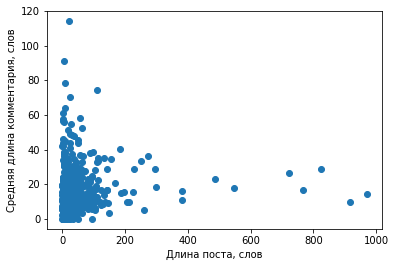

In [7]:
X, Y = zip(*[(i['length'],mean([j['length'] for j in processed_comments[str(i['id'])]])) for i in processed_posts])
plt.scatter(X,Y)
plt.xlabel("Длина поста, слов")
plt.ylabel("Средняя длина комментария, слов")
plt.savefig('length_correlation.png')
plt.show()

Построим графики, показывающие среднюю длину поста и комментария для каждого возраста:

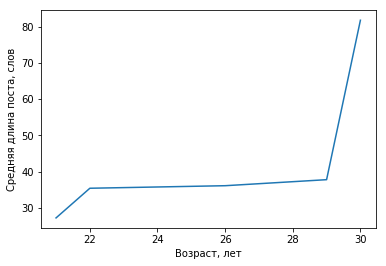

In [45]:
ages = set(i['age'] for i in processed_posts if i['age'])
X, Y = zip(*[(i,mean([j['length'] for j in processed_posts if j['age']==i])) for i in ages])
plt.plot(X,Y)
plt.xlabel("Возраст, лет")
plt.ylabel("Средняя длина поста, слов")
plt.savefig('age-post.png')
plt.show()

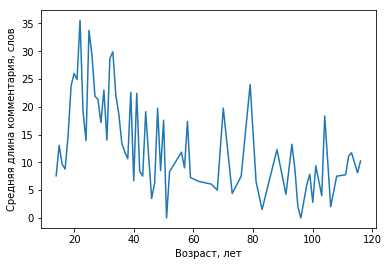

In [46]:
all_comments = sum_lists([val for key,val in processed_comments.items()])
commentator_ages = set(i['age'] for i in all_comments if i['age'])
X, Y = zip(*[(i,mean([j['length'] for j in all_comments if j['age']==i])) for i in commentator_ages])
plt.plot(X,Y)
plt.xlabel("Возраст, лет")
plt.ylabel("Средняя длина комментария, слов")
plt.savefig('age-comment.png')
plt.show()

Построим графики, показывающие среднюю длину поста и комментария для каждого города:

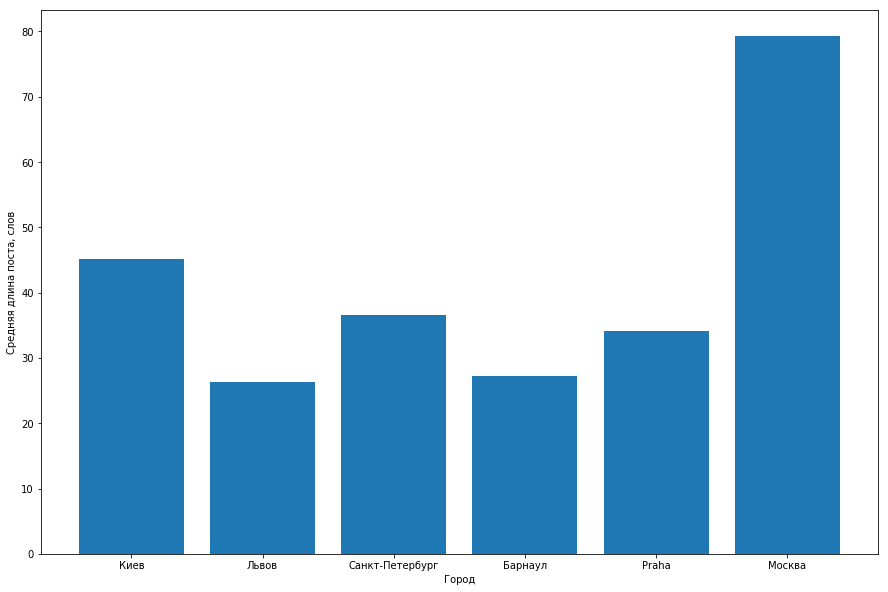

In [47]:
fig = plt.figure(figsize=(15,10))
cities = set(i['city'] for i in processed_posts if i['city'])
X, Y = zip(*[(i,mean([j['length'] for j in processed_posts if j['city']==i])) for i in cities])
plt.bar(range(len(X)),Y, figure = fig)
plt.xlabel("Город")
plt.ylabel("Средняя длина поста, слов")
plt.xticks(range(len(X)),X)
plt.savefig('city-post.png')
plt.show()

Так как городов, в которых проживают авторы комментариев, очень много, покажем на графике 20
городов с самой высокой средней длиной поста

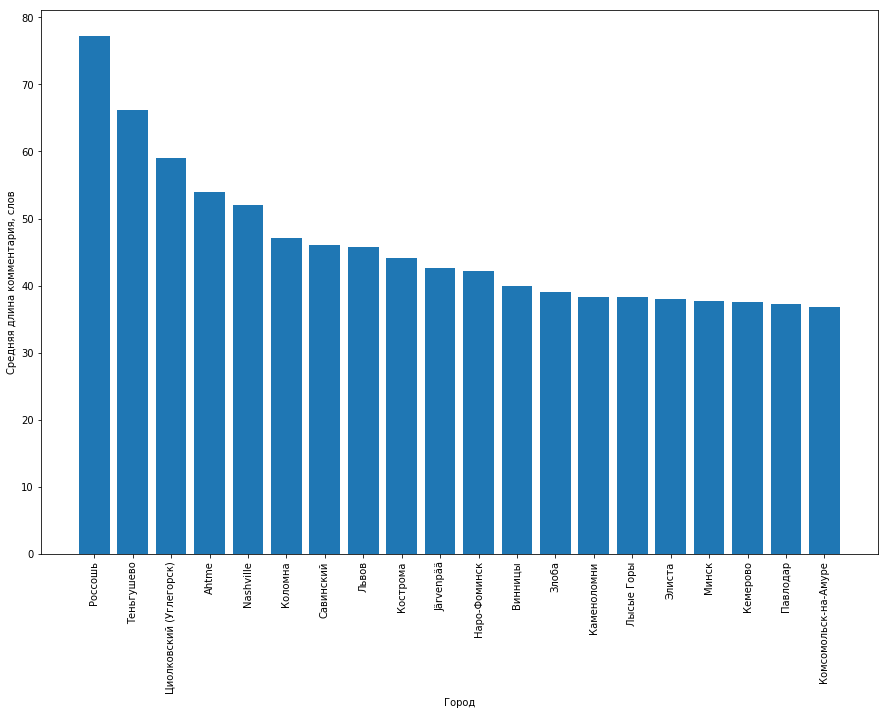

In [59]:
fig = plt.figure(figsize=(15,10))
cities = set(i['city'] for i in all_comments if i['city'])
XY = {i: mean([j['length'] for j in all_comments if j['city']==i]) for i in cities}
X = sorted(XY, key = lambda m:-XY[m])[:20]
Y = [XY[i] for i in X]
plt.bar(range(len(X)),Y, figure = fig)
plt.xlabel("Город")
plt.ylabel("Средняя длина комментария, слов")
plt.xticks(range(len(X)),X, rotation='vertical')
plt.savefig('city-comment.png')
plt.show()